http://surpriselib.com

<h1 style="color:blue; font-weight:bold">Assignment todo list</h1>

- Extract all the pipeline implemented function in a python script and import them in the notebook to use them.
- Implement the *get_user_recommendation* function.
- **Bonus** : Generalize the *get_trained_model* function to use any surprise model kwargs.

# Load data

In [1]:
import sys
sys.path.append("..")

# CREATE THE DATA_DIR PATH
from pathlib import Path
DATA_DIR = Path('../data/movielens/ml-latest-small')

<p style="color:blue; font-weight:bold">TODO</p>

- Extract the implemened functions in a python script and import them in the notebook.

## From surprise

In [2]:
from recsys_dsa_20.pipeline import load_ratings_from_surprise

In [3]:
ratings = load_ratings_from_surprise()
ratings

## From file

In [4]:
from recsys_dsa_20.pipeline import load_ratings_from_file

In [5]:
# Create the filepath
ratings_filepath = Path(DATA_DIR / 'ratings.csv')
# Use the function to load
ratings = load_ratings_from_file(ratings_filepath)
ratings

## Modular function

In [6]:
from recsys_dsa_20.pipeline import get_data

In [7]:
data = get_data(from_surprise=True)
data

# Manual pipeline

<p style="color:blue; font-weight:bold">TODO</p>

- Extract the implemened functions in a python script and import them in the notebook.

## Split data in train and test

In [8]:
from surprise.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)
train

In [9]:
train.n_users, train.n_items

(943, 1651)

## Train model

<p style="color:blue; font-weight:bold">TODO</p>

- Change the *model_kwargs* argument in the *get_trained_model* function to make it usable for any surprise model (SVD, KNN, NMF, etc).

In [10]:
from recsys_dsa_20.pipeline import get_trained_model

In [11]:
# Import all the model
from surprise import BaselineOnly, KNNBasic, NMF, SVD, SVDpp

model = get_trained_model(SVD, train)

## Make predictions

In [12]:
predictions = model.test(test)
predictions[:10]

[Prediction(uid='907', iid='143', r_ui=5.0, est=5, details={'was_impossible': False}),
 Prediction(uid='371', iid='210', r_ui=4.0, est=3.9766270058121074, details={'was_impossible': False}),
 Prediction(uid='218', iid='42', r_ui=4.0, est=3.433723681029705, details={'was_impossible': False}),
 Prediction(uid='829', iid='170', r_ui=4.0, est=3.879613988395854, details={'was_impossible': False}),
 Prediction(uid='733', iid='277', r_ui=1.0, est=2.942918506993366, details={'was_impossible': False}),
 Prediction(uid='363', iid='1512', r_ui=1.0, est=3.30346759474156, details={'was_impossible': False}),
 Prediction(uid='193', iid='487', r_ui=5.0, est=3.7953773314051857, details={'was_impossible': False}),
 Prediction(uid='808', iid='313', r_ui=5.0, est=4.4646595197930665, details={'was_impossible': False}),
 Prediction(uid='557', iid='682', r_ui=2.0, est=3.1604032939063926, details={'was_impossible': False}),
 Prediction(uid='774', iid='196', r_ui=3.0, est=2.3096989164265977, details={'was_impo

## Evaluation

In [13]:
from surprise import accuracy

accuracy.rmse(predictions=predictions)

RMSE: 0.9323


0.9322655775023296

In [14]:
accuracy.mae(predictions=predictions)

MAE:  0.7353


0.735288375735942

## Modular code :

ONE train_and_evaluate_model_pipeline for any model

In [15]:
from recsys_dsa_20.pipeline import train_and_evalute_model_pipeline

In [16]:
# Train and evaluate KNNBasic
model_kwargs = {'sim_options': {'user_based': True, 'name': 'pearson'}}

my_model, metrics_dict = train_and_evalute_model_pipeline(KNNBasic, model_kwargs)
metrics_dict

Computing the pearson similarity matrix...
Done computing similarity matrix.


{'RMSE': 1.0150350905205965,
 'MAE': 1.0150350905205965,
 'test_time': 2.7238638401031494,
 'fit_time': 1.8021392822265625}

In [17]:
# Train and evaluate SVD
my_model, metrics_dict = train_and_evalute_model_pipeline(SVD)
metrics_dict

{'RMSE': 0.9379915701898932,
 'MAE': 0.9379915701898932,
 'test_time': 0.13663721084594727,
 'fit_time': 3.8262412548065186}

# Benchmarking

<p style="color:blue; font-weight:bold">TODO</p>

- Add the other models (baseline, item based with cosine & pearson sim metrics, NMF, SVD)
- Add the fit_time in the benchmarking

In [18]:
import time
benchmark_dict = {}

model_dict_list = [
    {
        'model_name' : 'BaselineOnly',
        'model_class' : BaselineOnly,
        'model_kwargs' : {}
    },
    {
        'model_name' : 'KNN user based with cosine similarity',
        'model_class' : KNNBasic,
        'model_kwargs' : {'sim_options': {'user_based': True, 'name': 'cosine'}}
    },
    {
        'model_name' : 'KNN user based with pearson similarity',
        'model_class' : KNNBasic,
        'model_kwargs' : {'sim_options': {'user_based': True, 'name': 'pearson'}}
    },
    {
        'model_name' : 'KNN item based with cosine similarity',
        'model_class' : KNNBasic,
        'model_kwargs' : {'sim_options': {'user_based': False, 'name': 'cosine'}}
    },
    {
        'model_name' : 'KNN item based with pearson similarity',
        'model_class' : KNNBasic,
        'model_kwargs' : {'sim_options': {'user_based': False, 'name': 'pearson'}}
    },
    {
        'model_name' : 'SVD',
        'model_class' : SVD,
        'model_kwargs' : {}
    },
    {
        'model_name' : 'SVD++',
        'model_class' : SVDpp,
        'model_kwargs' : {}
    },
    {
        'model_name' : 'NMF',
        'model_class' : NMF,
        'model_kwargs' : {}
    }
]
for model_dict in model_dict_list:
    model, metrics_dict = train_and_evalute_model_pipeline(
        model_dict['model_class'], model_dict['model_kwargs'])
    benchmark_dict[model_dict['model_name']] = metrics_dict
    model_dict['fitted_model'] = model    

benchmark_dict

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


{'BaselineOnly': {'RMSE': 0.9441798799352237,
  'MAE': 0.9441798799352237,
  'test_time': 0.1416153907775879,
  'fit_time': 0.16754651069641113},
 'KNN user based with cosine similarity': {'RMSE': 1.0193536815834319,
  'MAE': 1.0193536815834319,
  'test_time': 2.640235424041748,
  'fit_time': 1.277660846710205},
 'KNN user based with pearson similarity': {'RMSE': 1.0150350905205965,
  'MAE': 1.0150350905205965,
  'test_time': 2.6117076873779297,
  'fit_time': 1.7997081279754639},
 'KNN item based with cosine similarity': {'RMSE': 1.0264295933767333,
  'MAE': 1.0264295933767333,
  'test_time': 2.971062421798706,
  'fit_time': 1.875281572341919},
 'KNN item based with pearson similarity': {'RMSE': 1.041104054968961,
  'MAE': 1.041104054968961,
  'test_time': 3.008362293243408,
  'fit_time': 2.6062114238739014},
 'SVD': {'RMSE': 0.9373433797429733,
  'MAE': 0.9373433797429733,
  'test_time': 0.13563752174377441,
  'fit_time': 3.7301180362701416},
 'SVD++': {'RMSE': 0.9170632403672749,
  '

In [19]:
# Save in pandas for the plotting
import pandas
benchmark_df = pandas.DataFrame(benchmark_dict)
benchmark_df.head()

,BaselineOnly,KNN user based with cosine similarity,KNN user based with pearson similarity,KNN item based with cosine similarity,KNN item based with pearson similarity,SVD,SVD++,NMF
RMSE,0.944180,1.019354,1.015035,1.026430,1.041104,0.937343,0.917063,0.962903
MAE,0.944180,1.019354,1.015035,1.026430,1.041104,0.937343,0.917063,0.962903
test_time,0.141615,2.640235,2.611708,2.971062,3.008362,0.135638,2.559390,0.199467
fit_time,0.167547,1.277661,1.799708,1.875282,2.606211,3.730118,140.381084,4.133215


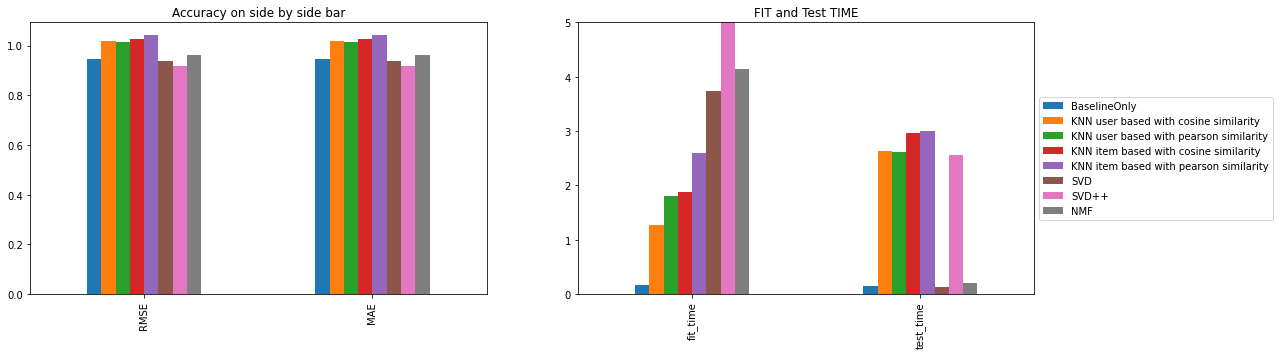

In [20]:
# Let us visualise accuracy metrics


import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize= (18, 5))

benchmark_df.loc[['RMSE','MAE']].plot.bar(ax = axes[0], legend = False)
axes[0].set_title('Accuracy on side by side bar', loc='center')

benchmark_df.loc[['fit_time','test_time']].plot.bar(ax = axes[1])
axes[1].set_title('FIT and Test TIME', loc='center')
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Since SVD++ is so slow let us trim the y axis just to have a better view or the remaining algo
axes[1].set_ylim(0,5)
plt.show()

# Cross validation

In [21]:
from surprise.model_selection import cross_validate

cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9623  0.9708  0.9564  0.9733  0.9628  0.9651  0.0062  
MAE (testset)     0.7572  0.7609  0.7521  0.7641  0.7578  0.7584  0.0040  
Fit time          4.12    4.15    4.07    4.16    4.16    4.13    0.03    
Test time         0.08    0.09    0.09    0.19    0.08    0.11    0.04    


{'test_rmse': array([0.96232178, 0.97081428, 0.95635762, 0.97330697, 0.96282763]),
 'test_mae': array([0.75718845, 0.76089639, 0.75210864, 0.76413276, 0.75783291]),
 'fit_time': (4.119490385055542,
  4.147205352783203,
  4.068849086761475,
  4.159425497055054,
  4.160226821899414),
 'test_time': (0.08377385139465332,
  0.08577108383178711,
  0.08676719665527344,
  0.186004638671875,
  0.08382081985473633)}

# User recommendation

<p style="color:blue; font-weight:bold">TODO</p>

- Create a function that 

In [22]:
from recsys_dsa_20.recommendation import get_user_recommendation

In [23]:
# The movies dataset
movies = pandas.read_csv(DATA_DIR / 'movies.csv')
# userid and k
userid = 165
k =5

FIRST Let us test it with the test data coming from the split train test of surprise

In [24]:
# While loading it with surprise, it has be converted to list let us put it to a pandas DataFrame
# Indeed get_user_recommendation is built with the input data as pandas dataframe

data_to_test = pandas.DataFrame(test).rename(columns = {0: 'userId', 1: 'movieId', 2: 'rating'})


In [25]:
# Now let us give a try for the KNN user-based with pearson 
display(model_dict_list[2]['fitted_model'])
get_user_recommendation(model_dict_list[5]['fitted_model'], userid, k, data_to_test, movies)

,title,genres,PredictedRating,TrueRating
2336,Jury Duty (1995),Comedy,4.94,4.0
2337,Total Eclipse (1995),Drama|Romance,3.96,4.0
2338,Love Affair (1994),Drama|Romance,3.92,4.0
2339,Cutthroat Island (1995),Action|Adventure|Romance,3.88,5.0
2340,Roommates (1995),Comedy|Drama,3.84,3.0


In [26]:
# With SVD, userid = 354, k =5
display(model_dict_list[5]['fitted_model'])
get_user_recommendation(model_dict_list[5]['fitted_model'], userid, k, data_to_test, movies)

,title,genres,PredictedRating,TrueRating
2336,Jury Duty (1995),Comedy,4.94,4.0
2337,Total Eclipse (1995),Drama|Romance,3.96,4.0
2338,Love Affair (1994),Drama|Romance,3.92,4.0
2339,Cutthroat Island (1995),Action|Adventure|Romance,3.88,5.0
2340,Roommates (1995),Comedy|Drama,3.84,3.0


Let us try with the whole data of ratings

In [27]:
data_to_test = pandas.read_csv(DATA_DIR / 'ratings.csv')

In [28]:
# Now let us give a try for the KNN user-based with pearson 
# userid = 907, k =5
display(model_dict_list[2]['fitted_model'])
get_user_recommendation(model_dict_list[5]['fitted_model'], userid, k, data_to_test, movies)

,title,genres,PredictedRating,TrueRating
820,Braveheart (1995),Action|Drama|War,3.53,4.0
821,Immortal Beloved (1994),Drama|Romance,3.53,4.0
822,Maverick (1994),Adventure|Comedy|Western,3.53,4.0
823,Speed (1994),Action|Romance|Thriller,3.53,4.0
824,Dazed and Confused (1993),Comedy,3.53,3.0


In [29]:
# With SVD, userid = 893, k =5
display(model_dict_list[5]['fitted_model'])
get_user_recommendation(model_dict_list[5]['fitted_model'], userid, k, data_to_test, movies)

,title,genres,PredictedRating,TrueRating
820,Braveheart (1995),Action|Drama|War,3.53,4.0
821,Immortal Beloved (1994),Drama|Romance,3.53,4.0
822,Maverick (1994),Adventure|Comedy|Western,3.53,4.0
823,Speed (1994),Action|Romance|Thriller,3.53,4.0
824,Dazed and Confused (1993),Comedy,3.53,3.0


> So depending on the testing data we have different recommendation